Accuracy: 0.3486718259778289
Feature Importance:
remainder__Annual Income: 0.5533362340603244
remainder__Gender: 0.052921171312922434
cat__Color_Pale White: 0.022811893233788762
cat__Color_Red: 0.020932030633812285
cat__Body Style_Hardtop: 0.008435988431028966
cat__Body Style_Hatchback: 0.0073448315695965214
cat__Body Style_SUV: 0.007335966115574154
cat__Company_Pontiac: 0.006614602738294022
cat__Color_Black: 0.005948635805939602
cat__Model_528i: 0.0050066335334234
cat__Model_Diamante: 0.004953492950069063
cat__Company_Lexus: 0.00478639071664235
cat__Company_Chrysler: 0.004674372424135038
cat__Model_Neon: 0.004621172438810352
cat__Model_Montero Sport: 0.004061549122752616
cat__Company_Subaru: 0.0038019983303858923
cat__Company_Honda: 0.0037717230487345236
cat__Model_RL: 0.0036422889512964115
cat__Company_Audi: 0.003632492306651523
cat__Model_Carrera Coupe: 0.003540913254225007
cat__Model_Metro: 0.0035383129867420974
cat__Model_3000GT: 0.003486042696749688
cat__Company_Oldsmobile: 0.003

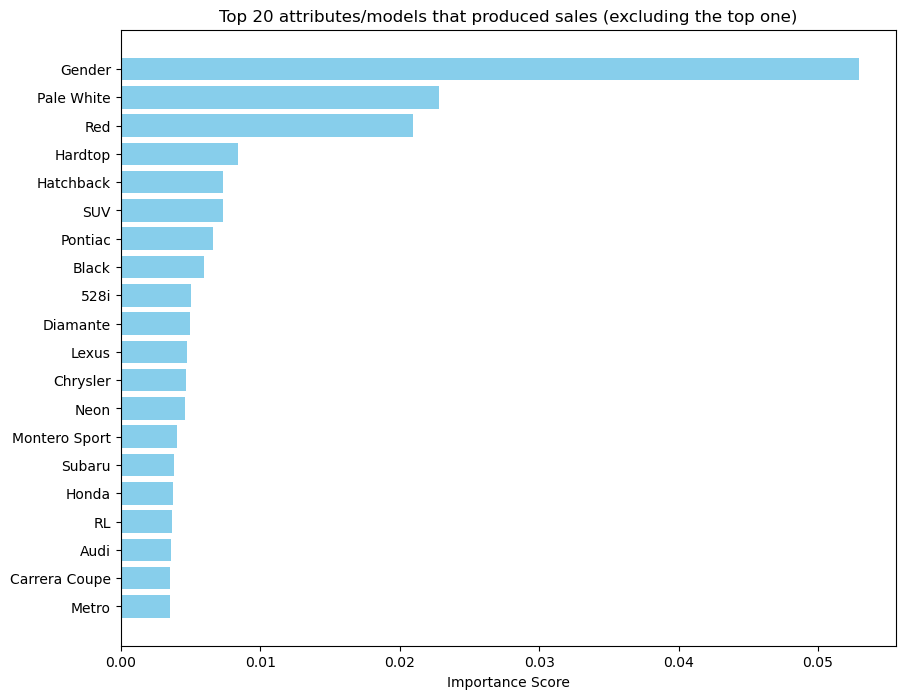

Feature Importance for High Income Group:
remainder__Annual Income: 0.6164589438688108
remainder__Gender: 0.05254466936656724
cat__Color_Pale White: 0.019139541421848632
cat__Color_Red: 0.01658283302731028
cat__Body Style_Hardtop: 0.007868217957934723
cat__Body Style_SUV: 0.007591392429935301
cat__Body Style_Hatchback: 0.0056012919314543455
cat__Color_Black: 0.005047883369865178
cat__Company_Chrysler: 0.0045389050756350436
cat__Body Style_Sedan: 0.0043669370112045655
cat__Model_528i: 0.004124290439799283
cat__Company_Lexus: 0.0036987511328829227
cat__Company_Pontiac: 0.003674152590560776
cat__Model_Montero Sport: 0.003662187248887287
cat__Company_Chevrolet: 0.0035193843642832147
cat__Body Style_Passenger: 0.0034707212241023213
cat__Model_Neon: 0.003451480641250173
cat__Model_Diamante: 0.00345007322861916
cat__Model_S40: 0.0033962098703599684
cat__Company_Honda: 0.003122436306482424
cat__Model_Forester: 0.0030799035242528934
cat__Model_3000GT: 0.0030487844797872136
cat__Model_Carrera Co

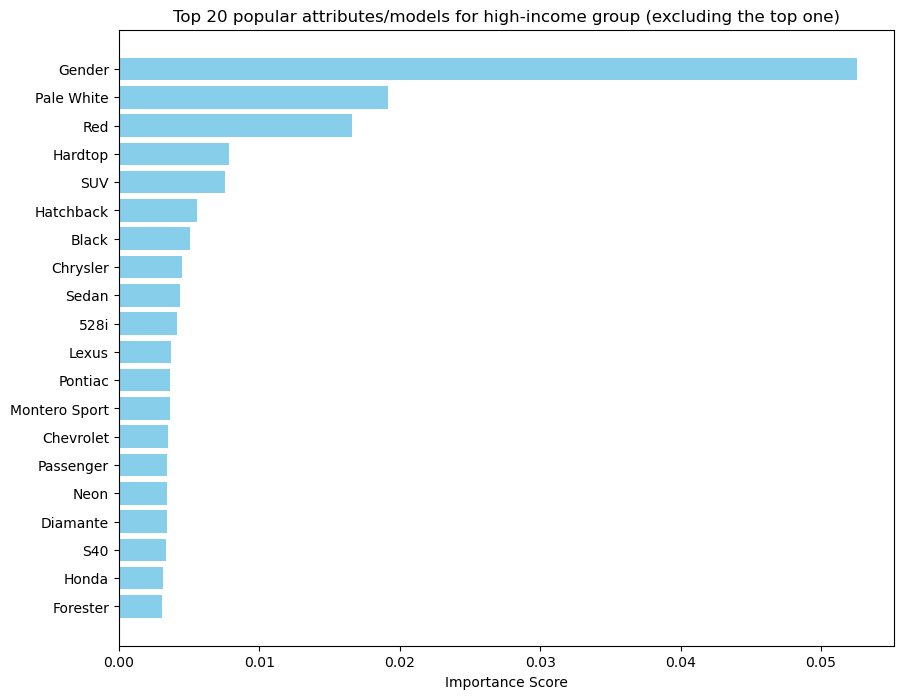

Feature Importance for Male Group:
remainder__Annual Income: 0.545883489681309
cat__Color_Red: 0.031121935386209592
cat__Color_Pale White: 0.023450690475807952
cat__Body Style_Hardtop: 0.011701009015254662
cat__Body Style_SUV: 0.00964929408939907
cat__Body Style_Hatchback: 0.008448565777214262
cat__Company_Honda: 0.006224340842016018
cat__Color_Black: 0.005655550211647514
cat__Model_3000GT: 0.00563525679757405
cat__Company_Lexus: 0.005405186012773021
cat__Model_Montero Sport: 0.005235172876998426
cat__Company_Chrysler: 0.005108476192346082
cat__Company_Pontiac: 0.004693763852230513
cat__Model_Tacoma: 0.004451967945364859
cat__Model_Concorde: 0.004304981720798036
cat__Body Style_Passenger: 0.004208929035303624
cat__Model_Neon: 0.004206875686202803
cat__Model_528i: 0.0041643793691858765
cat__Body Style_Sedan: 0.0041287778332476386
cat__Model_Crown Victoria: 0.004117758767421427
cat__Company_Chevrolet: 0.004022490326103697
cat__Model_SLK: 0.004020750391624981
cat__Model_Carrera Coupe: 0.0

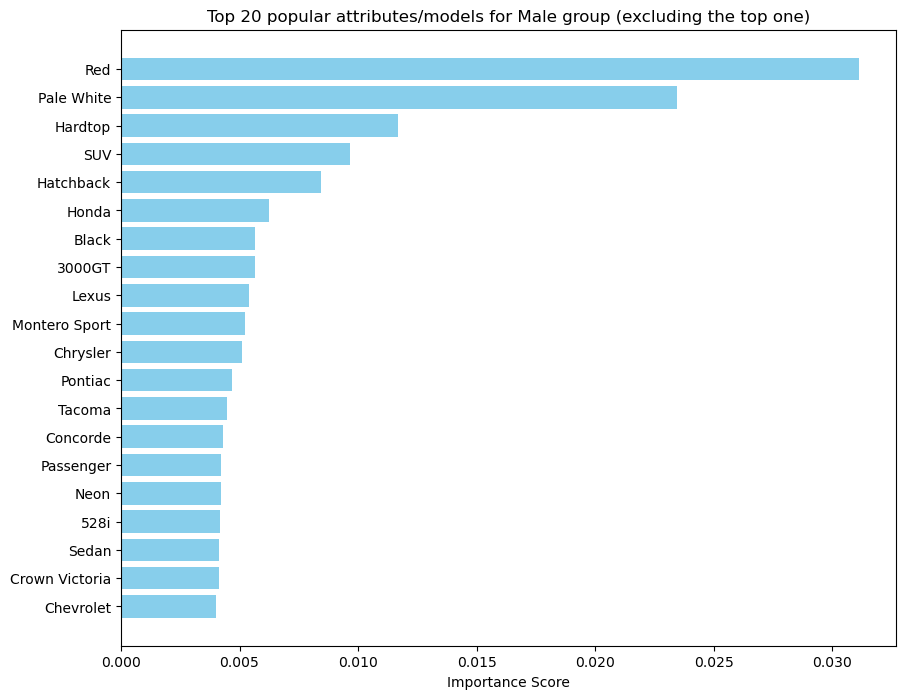

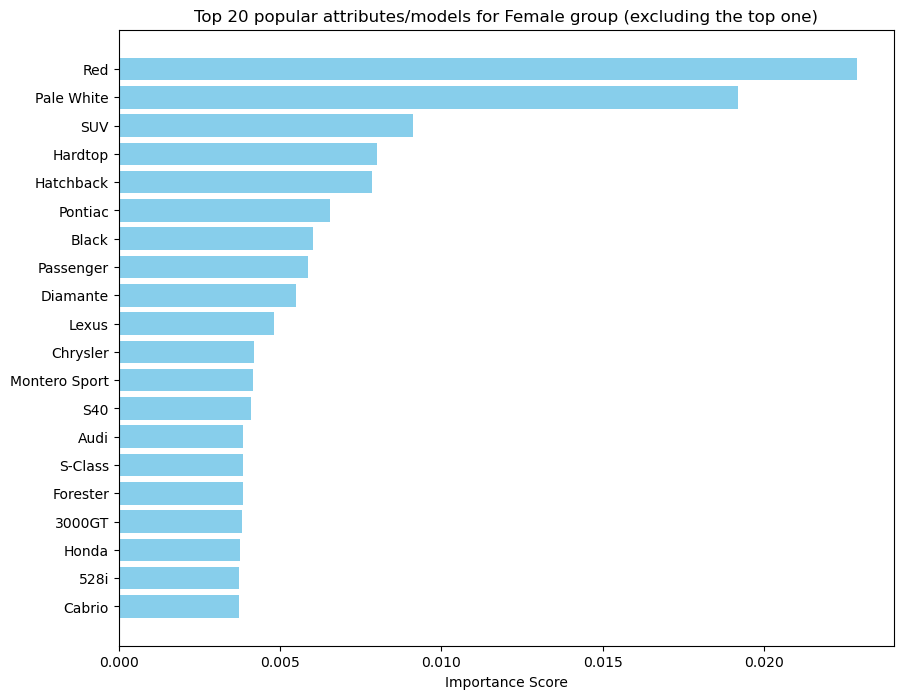

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("car_data.csv")

# Drop missing values
data.dropna(inplace=True)

# Drop columns we won't use
data = data.drop(['Car id', 'Date', 'Customer Name', 'Dealer_Name', 'Dealer No', 'Phone', 'Dealer_Region'], axis=1)

# Convert Gender column to numeric
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split dataset into features and target variable
X = data.drop('Price ($)', axis=1)
y = data['Price ($)']

# One-hot encode categorical variables
categorical_cols = ['Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict popularity of car models
y_pred = clf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Analyze important features
importance = clf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance = dict(zip(feature_names, importance))
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

# Extract top 15 feature names and importance scores
top_features = [f.split('_')[-1] for f, _ in sorted_importance[1:21]]  # Skip the first element
top_importance_scores = [importance for _, importance in sorted_importance[1:21]]  # Skip the first element

# Plot top 20 attributes/models that produced sales (excluding the top one)
plt.figure(figsize=(10, 8))
plt.barh(top_features, top_importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 attributes/models that produced sales (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Filter dataset based on Annual Income > 100000
data_high_income = data[data['Annual Income'] > 100000]

# Split dataset into features and target variable
X_high_income = data_high_income.drop('Price ($)', axis=1)
y_high_income = data_high_income['Price ($)']

# One-hot encode categorical variables
X_high_income = preprocessor.transform(X_high_income)

# Train the decision tree classifier
clf_high_income = DecisionTreeClassifier()
clf_high_income.fit(X_high_income, y_high_income)

# Analyze important features for high-income group
importance_high_income = clf_high_income.feature_importances_
feature_names_high_income = preprocessor.get_feature_names_out()
feature_importance_high_income = dict(zip(feature_names_high_income, importance_high_income))
sorted_importance_high_income = sorted(feature_importance_high_income.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance for High Income Group:")
for feature, importance in sorted_importance_high_income:
    print(f"{feature}: {importance}")

# Extract top 15 feature names and importance scores for high-income group
top_features_high_income = [f.split('_')[-1] for f, _ in sorted_importance_high_income[1:21]]  # Skip the first element
top_importance_scores_high_income = [importance for _, importance in sorted_importance_high_income[1:21]]  # Skip the first element

# Plot top 20 popular attributes/models for high-income group (excluding the top one)
plt.figure(figsize=(10, 8))
plt.barh(top_features_high_income, top_importance_scores_high_income, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 popular attributes/models for high-income group (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Filter dataset based on Gender
data_male = data[data['Gender'] == 0]  # Assuming 0 represents Male
data_female = data[data['Gender'] == 1]  # Assuming 1 represents Female

# Split dataset into features and target variable for Male and Female groups
X_male = data_male.drop('Price ($)', axis=1)
y_male = data_male['Price ($)']
X_female = data_female.drop('Price ($)', axis=1)
y_female = data_female['Price ($)']

# One-hot encode categorical variables for Male and Female groups
X_male = preprocessor.transform(X_male)
X_female = preprocessor.transform(X_female)

# Train the decision tree classifier for Male and Female groups
clf_male = DecisionTreeClassifier()
clf_female = DecisionTreeClassifier()
clf_male.fit(X_male, y_male)
clf_female.fit(X_female, y_female)

# Analyze important features for Male and Female groups
importance_male = clf_male.feature_importances_
importance_female = clf_female.feature_importances_
feature_names_male = preprocessor.get_feature_names_out()
feature_names_female = preprocessor.get_feature_names_out()
feature_importance_male = dict(zip(feature_names_male, importance_male))
feature_importance_female = dict(zip(feature_names_female, importance_female))
sorted_importance_male = sorted(feature_importance_male.items(), key=lambda x: x[1], reverse=True)
sorted_importance_female = sorted(feature_importance_female.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance for Male Group:")
for feature, importance in sorted_importance_male:
    print(f"{feature}: {importance}")

print("Feature Importance for Female Group:")
for feature, importance in sorted_importance_female:
    print(f"{feature}: {importance}")

# Extract top 15 feature names and importance scores for Male and Female groups
top_features_male = [f.split('_')[-1] for f, _ in sorted_importance_male[1:21]]  # Skip the first element
top_features_female = [f.split('_')[-1] for f, _ in sorted_importance_female[1:21]]  # Skip the first element
top_importance_scores_male = [importance for _, importance in sorted_importance_male[1:21]]  # Skip the first element
top_importance_scores_female = [importance for _, importance in sorted_importance_female[1:21]]  # Skip the first element

# Plot top 20 popular attributes/models for Male and Female groups (excluding the top one)
plt.figure(figsize=(10, 8))
plt.barh(top_features_male, top_importance_scores_male, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 popular attributes/models for Male group (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

plt.figure(figsize=(10, 8))
plt.barh(top_features_female, top_importance_scores_female, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 popular attributes/models for Female group (excluding the top one)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()